In [11]:
# Allow rendering of Matplotlib plots directly on Jupyter Notebooks.
%matplotlib inline

# Import all dependencies required for the problem.
from __future__ import print_function
from plotly.offline import iplot, init_notebook_mode

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Set a Seed for random number generation for reproducible results
init_notebook_mode(connected=True)
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [3]:
# Load the titanic dataset using Pandas library 
df = pd.read_csv('../../data/startup_profit_dataset.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# Split the dataset into dependent features (passenger details used for prediction)
# and target features (prediction if the passenger survived)
x = df.loc[:,:'State']
y = df['Profit']

In [6]:
# Encoding categorical data
encoded_states = pd.get_dummies(x['State']).drop(['Florida'], axis=1)
encoded_x = pd.concat([x.loc[:, :'Marketing Spend'], encoded_states], axis=1)

In [7]:
# Split the dataset into train and test, for learning from one dataset and test it on the other.
X_train, X_test, y_train, y_test = train_test_split(encoded_x, y, test_size=0.2, random_state=42)

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
from math import sqrt
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error Linear Regression Model: {:.2f}".format(
    sqrt(mean_squared_error(y_test.values, regressor.predict(X_test)))
))

Root Mean Squared Error Linear Regression Model: 9055.96


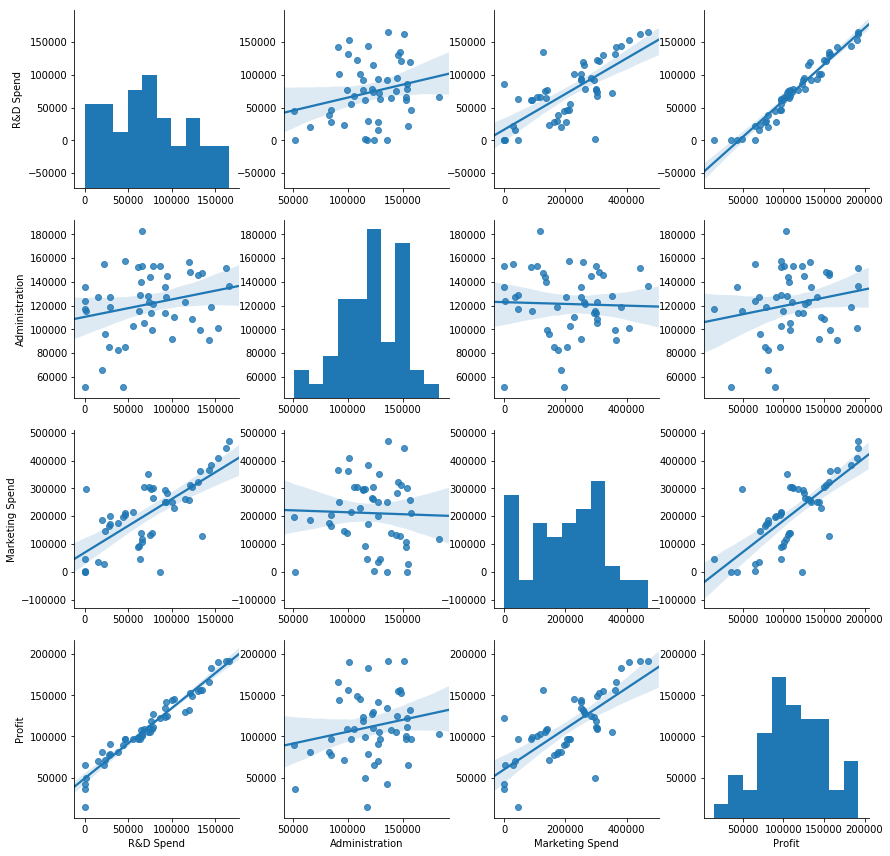

In [15]:
sns.pairplot(df, kind='reg', size=3)

In [16]:
plot1 = go.Scatter(
    x = X_train['R&D Spend'].values,
    y = y_train.values,
    name='Training Data',
    mode='markers'
)

plot2 = go.Scatter(
    x = X_train['R&D Spend'].values,
    y = regressor.predict(X_train.values),
    name='Model Prediction',
    connectgaps=True,
    mode='markers'
)

fig = dict(data=[plot1, plot2], layout=dict(
    title='Salary vs Experience',
    xaxis=dict(title='Experience (years)'),
    yaxis=dict(title='Salary')))
iplot(fig)